In [2]:
# Reading the dataset
# Importing pandas library
import pandas as pd
# Loading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood.csv')

In [3]:
seed = 7

In [4]:
mydata

,Time,Area,RH,ET,P,AT,SM,GHF
0,1/1/2005,3563530.00,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,1/2/2005,3474497.25,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,1/3/2005,3467959.75,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,1/4/2005,3605078.50,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,1/5/2005,3945098.25,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815
...,...,...,...,...,...,...,...,...
3989,12/4/2015,2558446.25,70.756050,0.000004,0.084317,4.142236,1.330013,-15.481495
3990,12/5/2015,2553516.75,76.970886,0.000004,0.119789,4.088312,1.323480,-12.413648
3991,12/6/2015,2552695.50,80.957146,0.000003,0.182801,5.052332,1.317485,-3.347597
3992,12/7/2015,2545706.50,79.400673,0.000004,0.241517,6.233972,1.313668,-6.115736


In [ ]:
# Preparing the output and input variables

In [6]:
# Target variable, y
y = mydata['Area']

In [7]:
y.shape

(3994,)

In [8]:
print(y[:3])

0    3563530.00
1    3474497.25
2    3467959.75
Name: Area, dtype: float64


In [9]:
# Features, X
X = mydata.drop(['Time', 'Area'], axis = 1)

In [10]:
X.shape

(3994, 6)

In [11]:
X.head()

,RH,ET,P,AT,SM,GHF
0,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815


In [ ]:
# VIF and Scaling the features

In [13]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30, shuffle = True)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2995, 6) (999, 6) (2995,) (999,)


In [1]:
# Importing necessary libraries and functions 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from numpy import absolute
# Importing warnings() to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Hyperparameter Tuning with XGBR
model = XGBRegressor()
xgb_params = {'learning_rate': [0.001, 0.01, 0.1],
              'n_estimators': [100, 500, 1000],
              'subsample': [0.1, 0.3, 0.5],
              'colsample_bytree': [0.1, 0.3, 0.5],
              'max_depth': [3, 6, 9]
}
xgb_cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
xgb_grid = GridSearchCV(model, xgb_params, cv = xgb_cv, scoring = 'neg_mean_squared_error', n_jobs = -1)
xgb_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.1, 0.3, 0.5]},
             scoring='neg_mean_squared_error')

In [24]:
# rinting the best parameters and score
print('The best parameters are:', xgb_grid.best_params_)
print('The best score is:', xgb_grid.best_score_)

The best parameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}
The best score is: -235138520738.53864


In [25]:
# Fitting the model on the training dataset using the best parameters
# Initialization
model = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.01, max_depth = 6, n_estimators = 1000, subsample = 0.5)

In [26]:
# Fitting the model on the training dataset
xgb = model.fit(X_train, y_train)

In [30]:
# Model performance evaluation on the training dataset
xgb_predtr = xgb.predict(X_train)
print('The training r-sq is:', r2_score(y_train, xgb_predtr))
print('The training MAE is:', mean_absolute_error(y_train, xgb_predtr))
print('The training MSE is:', mean_squared_error(y_train, xgb_predtr))

The training r-sq is: 0.9477878869916534
The training MAE is: 218401.32177629383
The training MSE is: 79535503987.66098


In [35]:
# Model performance evaluation on the testing dataset
xgb_predts = xgb.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, xgb_predts))
print('The testing MAE is:', mean_absolute_error(y_test, xgb_predts))
print('The testing MSE is:', mean_squared_error(y_test, xgb_predts))

The testing r-sq is: 0.8488461099711819
The testing MAE is: 358940.2427977978
The testing MSE is: 231135790448.42017


In [ ]:
# Cross-validation

In [37]:
# On the training dataset
xgb_cvtr = cross_val_score(xgb, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [38]:
xgb_cvtr

array([-2.57174814e+11, -2.28750260e+11, -2.34766243e+11, -2.35313968e+11,
       -2.59902377e+11])

In [39]:
# The absolute mean cv score
print('The absolute mean training cv score is:', absolute(np.mean(xgb_cvtr)))

The absolute mean training cv score is: 243181532254.89447


In [41]:
# On the testing dataset
xgb_cvts = cross_val_score(xgb, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)

In [42]:
print('The absolute mean testing cv score is:', absolute(np.mean(xgb_cvts)))

The absolute mean testing cv score is: 277831172082.03424


In [43]:
# Plotting the prediction error and residuals
from sklearn.preprocessing import StandardScaler

In [ ]:
# conda install conda-forge::yellowbrick

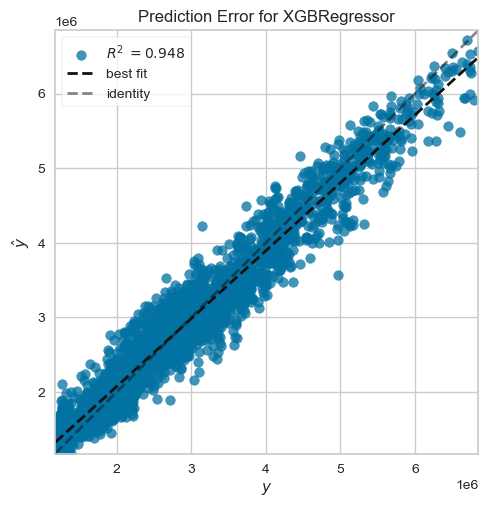

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
# Plotting the prediction error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

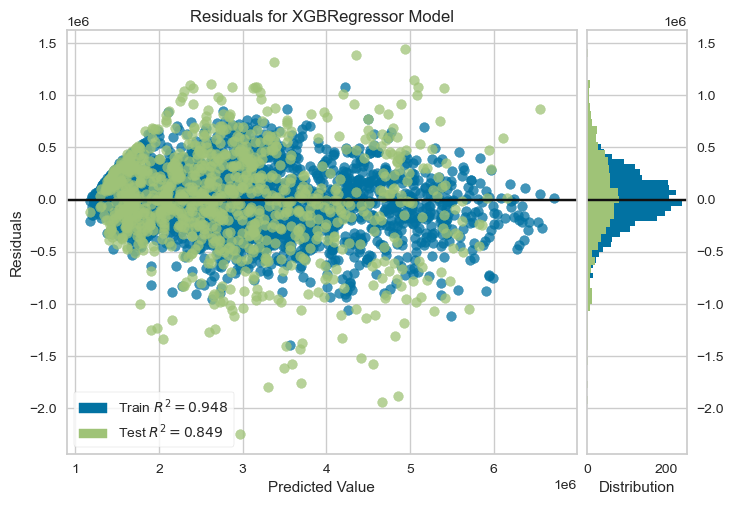

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [51]:
# Plotting the observed against predicted data
import matplotlib.pyplot as plt

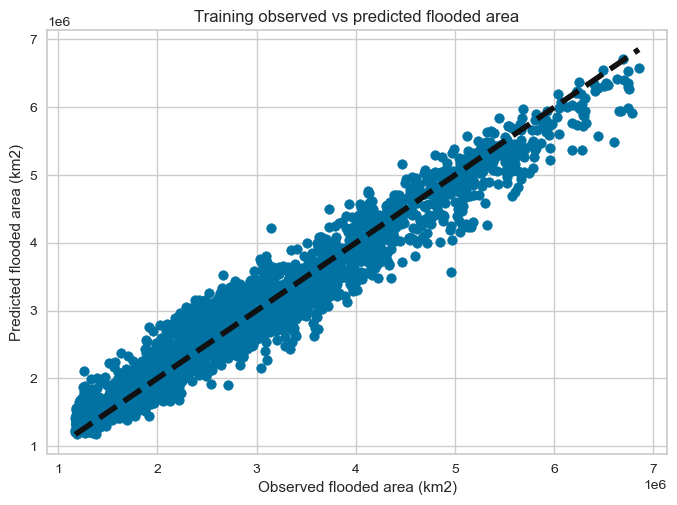

In [55]:
# For the training dataset
# Boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_train, xgb_predtr)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw = 4) # Line of best fit
# Labelling
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Training observed vs predicted flooded area')
plt.show()

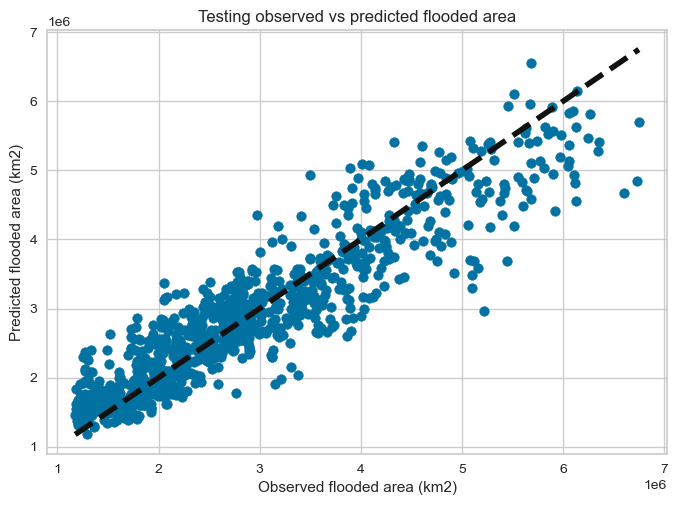

In [54]:
# For the testing dataset
# Boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_test, xgb_predts)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4) # Line of best fit
# Labelling
ax.set_xlabel('Observed flooded area (km2)')
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Testing observed vs predicted flooded area')
plt.show()

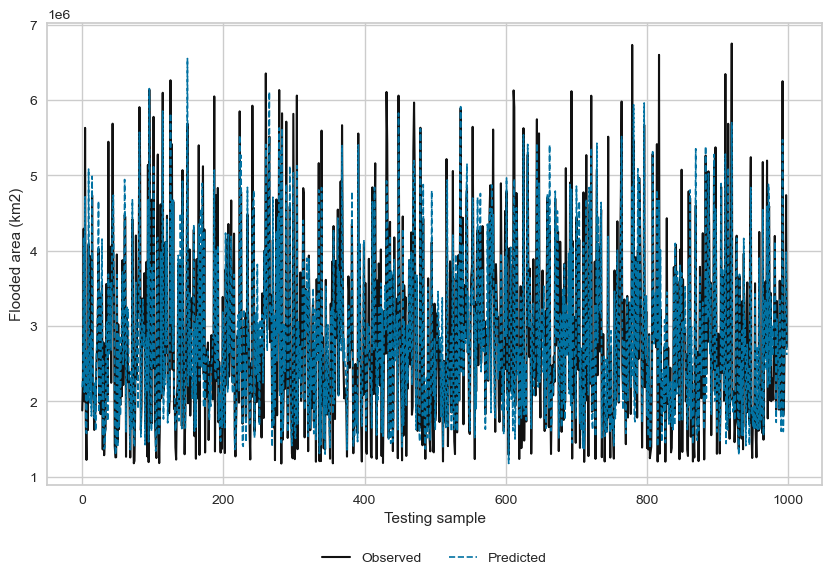

In [59]:
# Plotting observed and predicted data / Testing dataset
# Boundaries and characteristics of the plot
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, xgb_predts, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.2)
plt.xlabel('Testing sample')
plt.ylabel('Flooded area (km2)')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

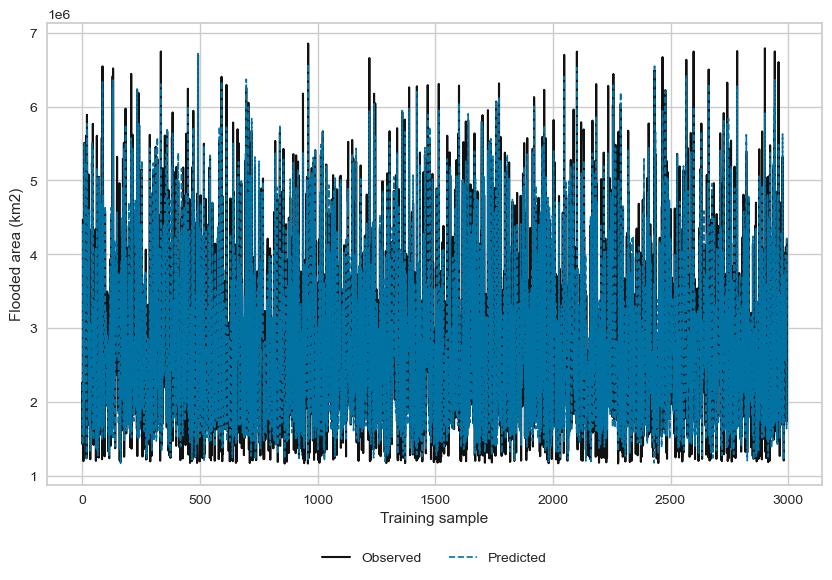

In [60]:
# Plotting observed and predicted data / Training dataset
# Boundaries and characteristics of the plot
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_train))
plt.plot(x_ax, y_train, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, xgb_predtr, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.2)
plt.xlabel('Training sample')
plt.ylabel('Flooded area (km2)')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()